Perform k-means clustering on customer data to segment them into groups

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [77]:
df = pd.read_csv('Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 30 non-null     int64  
 1   Customer_ID          30 non-null     int64  
 2   Product_ID           30 non-null     int64  
 3   Quantity             30 non-null     int64  
 4   Unit_Price           30 non-null     float64
 5   Sales_Revenue        30 non-null     float64
 6   Product_Description  30 non-null     object 
 7   Product_Category     30 non-null     object 
 8   Product_Line         30 non-null     object 
 9   Raw_Material         30 non-null     object 
 10  Region               30 non-null     object 
 11  Latitude             30 non-null     float64
 12  Longitude            30 non-null     float64
dtypes: float64(4), int64(4), object(5)
memory usage: 3.2+ KB


In [73]:
df.isnull().sum()

Date                   0
Customer_ID            0
Product_ID             0
Quantity               0
Unit_Price             0
Sales_Revenue          0
Product_Description    0
Product_Category       0
Product_Line           0
Raw_Material           0
Region                 0
Latitude               0
Longitude              0
dtype: int64

In [74]:
categorical_data = df.select_dtypes(include=['object','category'])
numerical_data = df.select_dtypes(include=['int','float'])
for x in categorical_data:
    df[x].fillna(df[x].mode()[0], inplace=True)
df.isnull().sum()


for x in numerical_data:
    df[x].fillna(np.mean(df[x]), inplace=True)
df.isnull().sum()

Date                   0
Customer_ID            0
Product_ID             0
Quantity               0
Unit_Price             0
Sales_Revenue          0
Product_Description    0
Product_Category       0
Product_Line           0
Raw_Material           0
Region                 0
Latitude               0
Longitude              0
dtype: int64

In [75]:
x = df.iloc[:, [3,4]].values

In [80]:
Wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i, random_state=1, n_init='auto')
    km.fit(x)
    Wcss.append(km.inertia_)
Wcss

[8166.970467556919,
 2063.0126395352304,
 590.9939836434285,
 310.6338698770878,
 178.07454439038773,
 136.24991916800084,
 99.8695236733435,
 95.25356074742237,
 86.46613118910554,
 51.3660800014532]

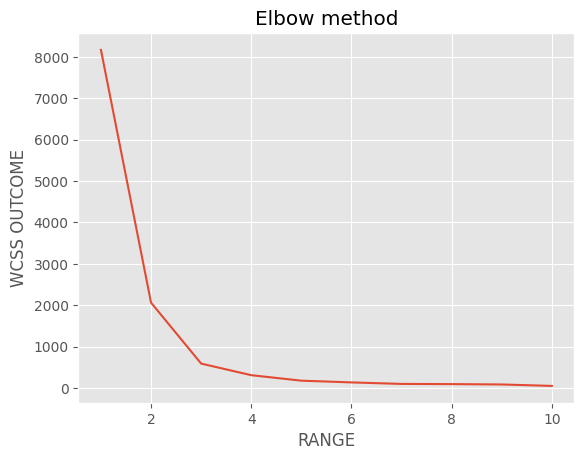

In [81]:
plt.style.use('ggplot')
plt.plot(range(1,11), Wcss)
plt.xlabel('RANGE')
plt.ylabel('WCSS OUTCOME')
plt.title('Elbow method')
plt.show()

In [82]:
km = KMeans(n_clusters=5,random_state=1, n_init='auto')
ypred = km.fit_predict(x)
ypred



array([1, 0, 0, 3, 4, 2, 0, 3, 4, 0, 3, 3, 0, 3, 0, 4, 2, 0, 4, 0, 3, 0,
       0, 2, 2, 2, 2, 0, 0, 0])

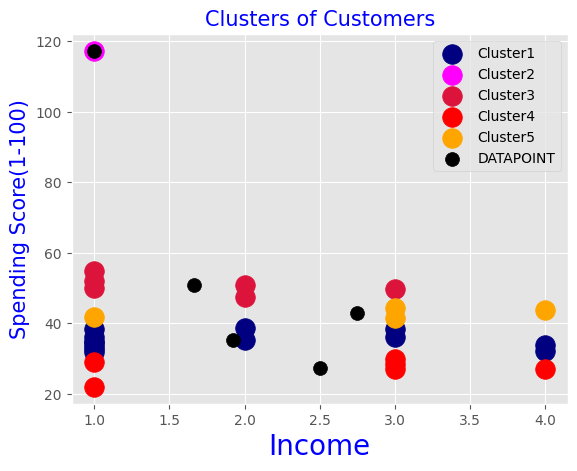

In [85]:
plt.scatter(x[ypred == 0,0], x[ypred == 0,1], c = 'navy', s = 200 , label='Cluster1')
plt.scatter(x[ypred == 1,0], x[ypred == 1,1], c = 'magenta', s = 200,label='Cluster2')
plt.scatter(x[ypred == 2,0], x[ypred == 2,1], c = 'crimson', s = 200,label='Cluster3')
plt.scatter(x[ypred == 3,0], x[ypred == 3,1], c = 'red', s = 200,label='Cluster4')
plt.scatter(x[ypred == 4,0], x[ypred == 4,1], c = 'orange', s = 200,label='Cluster5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'black', s=100, label='DATAPOINT')
plt.title('Clusters of Customers', color = 'blue', fontsize=15)
plt.xlabel('Income', color = 'blue', fontsize = 20)
plt.ylabel('Spending Score(1-100)', color = 'blue', fontsize=15)
plt.legend()
plt.show()


In [86]:
km2 = KMeans(n_clusters=2,random_state=1, n_init='auto')
ypred = km2.fit_predict(x)
ypred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

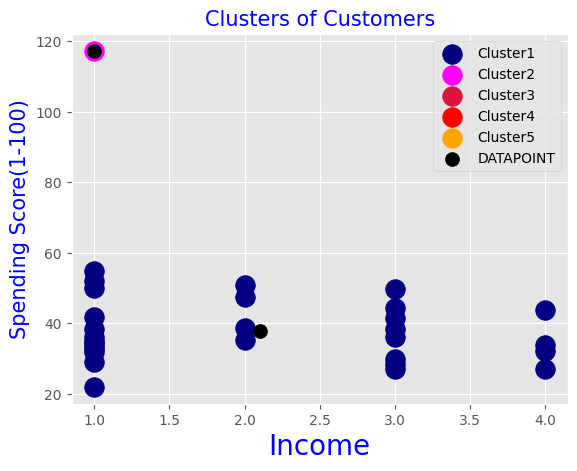

In [87]:
plt.scatter(x[ypred == 0,0], x[ypred == 0,1], c = 'navy', s = 200 , label='Cluster1')
plt.scatter(x[ypred == 1,0], x[ypred == 1,1], c = 'magenta', s = 200,label='Cluster2')
plt.scatter(x[ypred == 2,0], x[ypred == 2,1], c = 'crimson', s = 200,label='Cluster3')
plt.scatter(x[ypred == 3,0], x[ypred == 3,1], c = 'red', s = 200,label='Cluster4')
plt.scatter(x[ypred == 4,0], x[ypred == 4,1], c = 'orange', s = 200,label='Cluster5')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], c = 'black', s=100, label='DATAPOINT')
plt.title('Clusters of Customers', color = 'blue', fontsize=15)
plt.xlabel('Income', color = 'blue', fontsize = 20)
plt.ylabel('Spending Score(1-100)', color = 'blue', fontsize=15)
plt.legend()
plt.show()


In [89]:
km3 = KMeans(n_clusters=3,random_state=1, n_init='auto')
ypred = km3.fit_predict(x)
ypred



array([1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0])

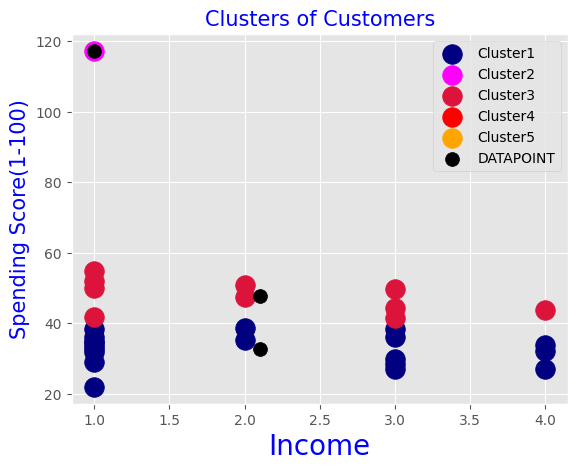

In [90]:
plt.scatter(x[ypred == 0,0], x[ypred == 0,1], c = 'navy', s = 200 , label='Cluster1')
plt.scatter(x[ypred == 1,0], x[ypred == 1,1], c = 'magenta', s = 200,label='Cluster2')
plt.scatter(x[ypred == 2,0], x[ypred == 2,1], c = 'crimson', s = 200,label='Cluster3')
plt.scatter(x[ypred == 3,0], x[ypred == 3,1], c = 'red', s = 200,label='Cluster4')
plt.scatter(x[ypred == 4,0], x[ypred == 4,1], c = 'orange', s = 200,label='Cluster5')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], c = 'black', s=100, label='DATAPOINT')
plt.title('Clusters of Customers', color = 'blue', fontsize=15)
plt.xlabel('Income', color = 'blue', fontsize = 20)
plt.ylabel('Spending Score(1-100)', color = 'blue', fontsize=15)
plt.legend()
plt.show()
